{'Campeche': ['Chetumal', 'Cd del Cármen', 'Mérida'], 'Cárdenas': ['Minatitlán', 'Villahermosa'], 'Cd del Cármen': ['Campeche', 'Villahermosa'], 'CDMX': ['Puebla'], 'Chetumal': ['Campeche', 'Playa del Cármen'], 'Coatzacoalcos': ['Juchitán', 'Minatitlán', 'Veracruz'], 'Córdoba': ['Orizaba', 'Veracruz'], 'Cancún': ['Mérida', 'Playa del Cármen'], 'Huatulco': ['Puerto Escondido', 'Salina Cruz'], 'Ixtepec': ['Juchitán'], 'Juchitán': ['Coatzacoalcos', 'Ixtepec', 'Tehuantepec', 'Tonalá'], 'Minatitlán': ['Cárdenas', 'Coatzacoalcos'], 'Matamoros': ['Reynosa', 'Tampico'], 'Mérida': ['Campeche', 'Cancún'], 'Oaxaca': ['Puebla', 'Tehuantepec'], 'Orizaba': ['Córdoba', 'Puebla'], 'Palenque': ['San Cristóbal de las Casas', 'Villahermosa'], 'Playa del Cármen': ['Cancún', 'Chetumal'], 'Poza Rica': ['Tuxpan', 'Veracruz'], 'Puebla': ['CDMX', 'Oaxaca', 'Orizaba'], 'Puerto Escondido': ['Huatulco'], 'Reynosa': ['Matamoros'], 'Salina Cruz': ['Huatulco', 'Tehuantepec'], 'San Cristóbal de las Casas': ['Palenque

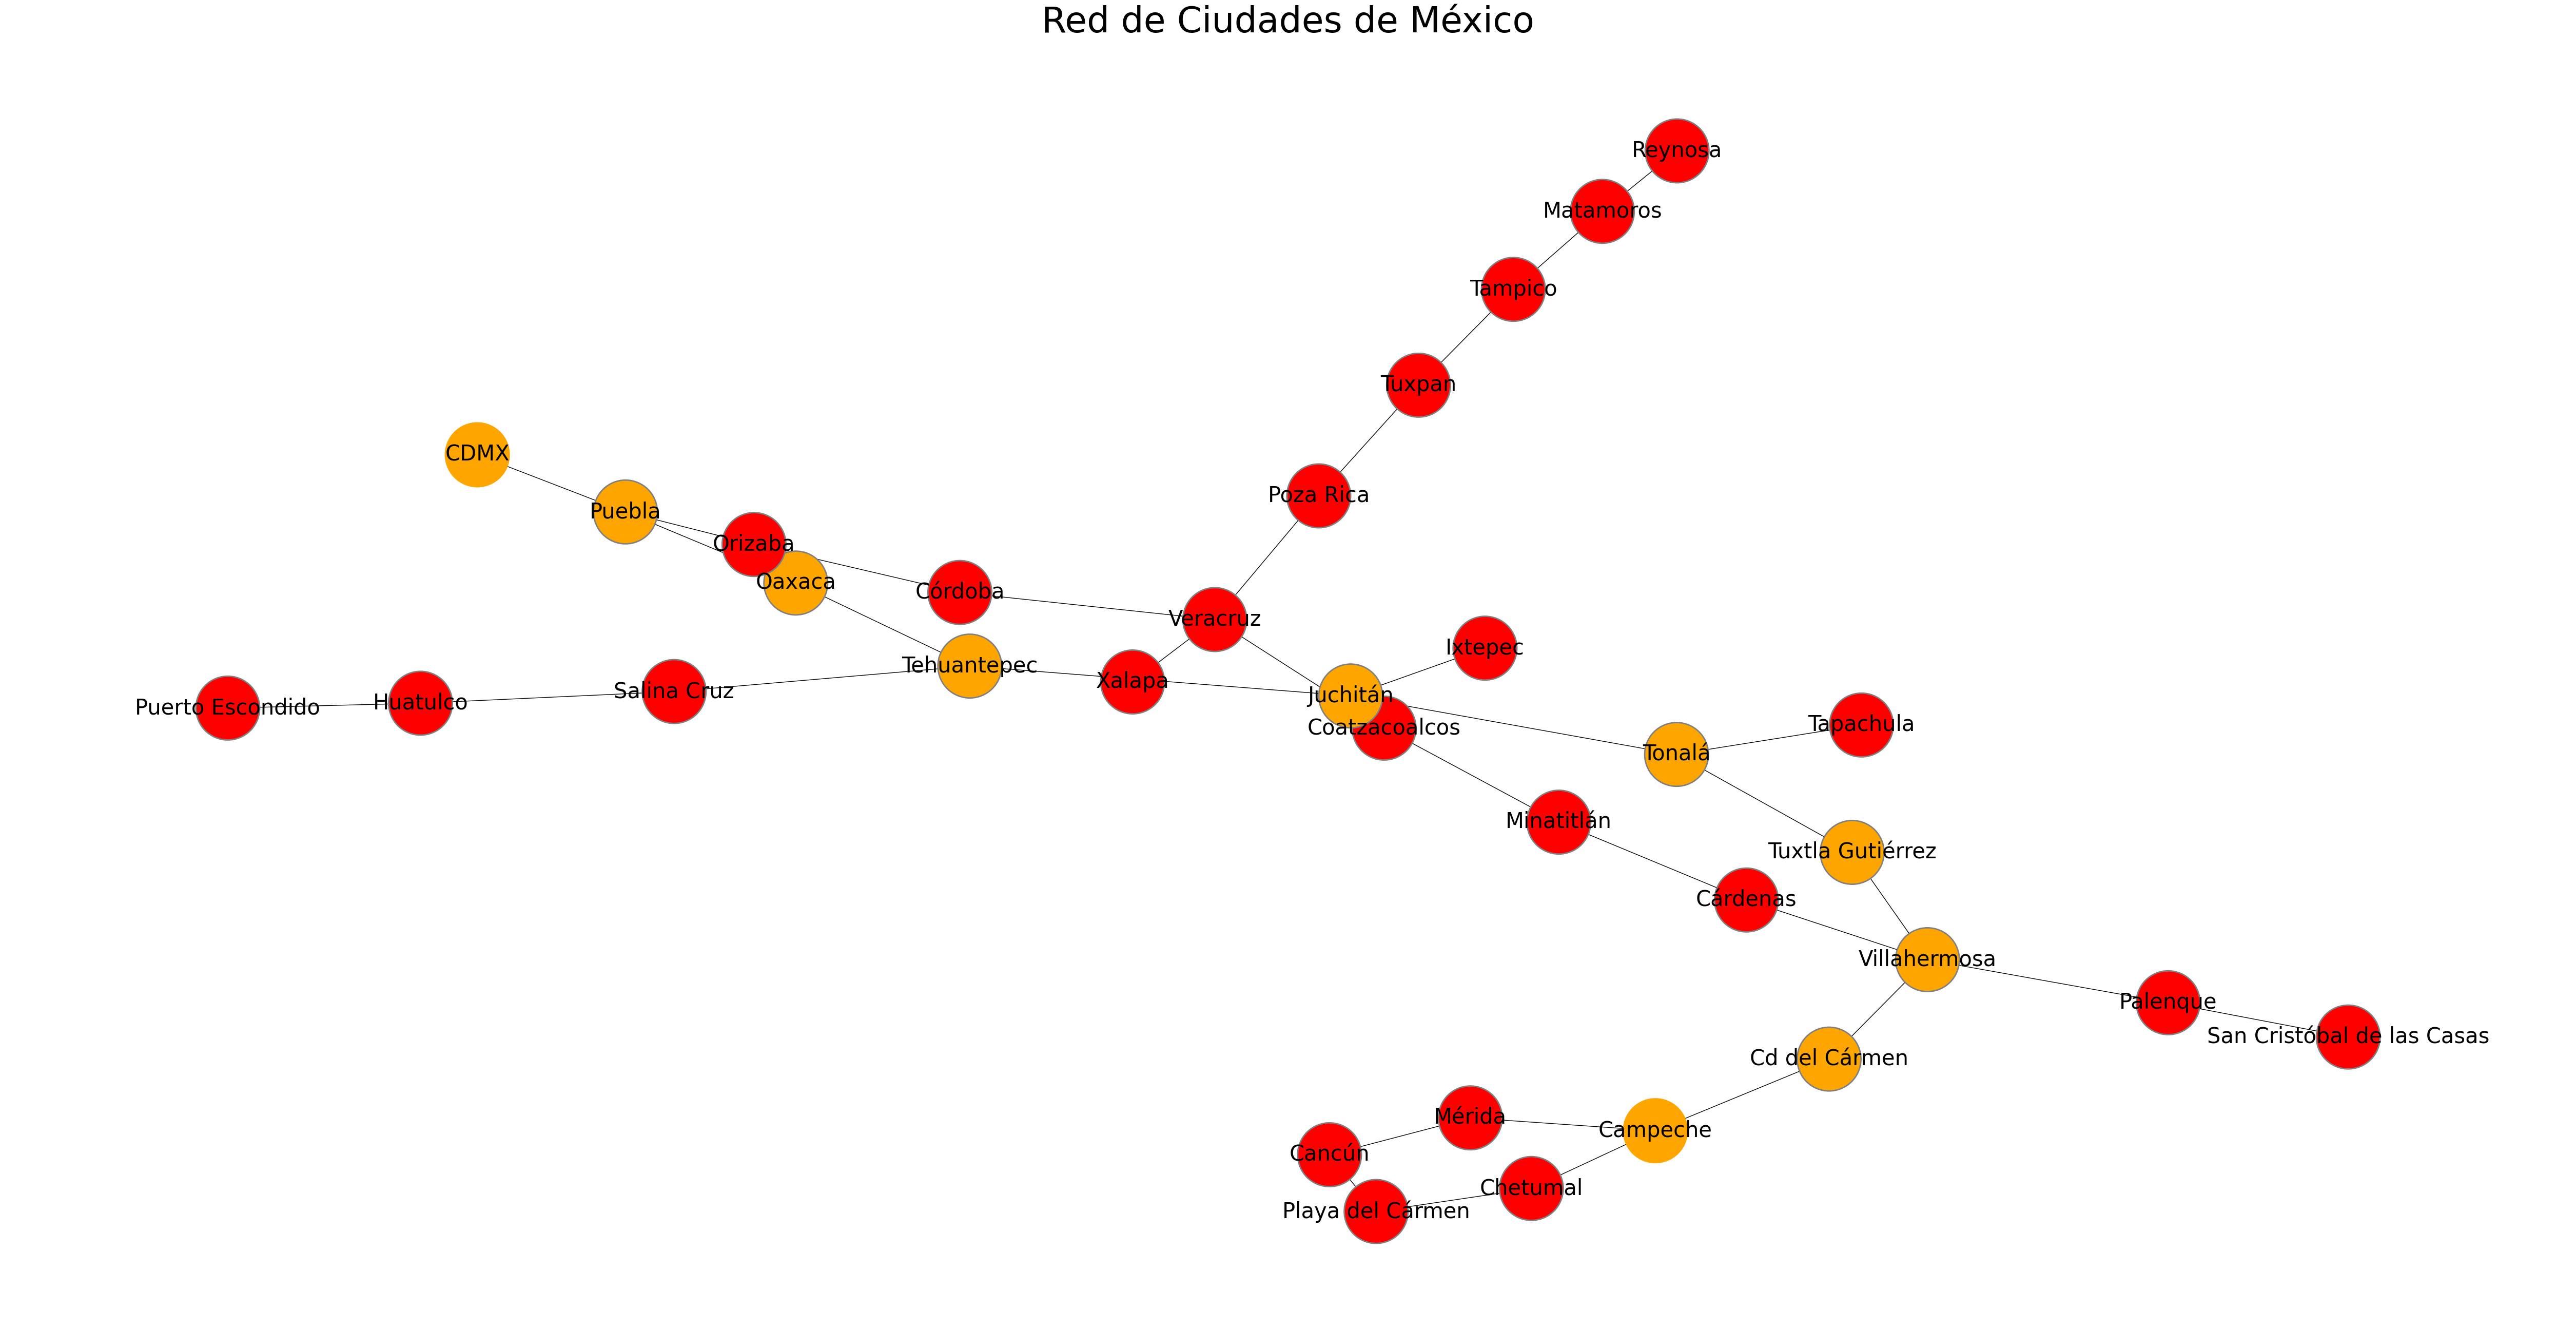

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

grafo = {
    'Campeche': ['Chetumal', 'Cd del Cármen', 'Mérida'],
    'Cárdenas': ['Minatitlán', 'Villahermosa'],
    'Cd del Cármen': ['Campeche', 'Villahermosa'],
    'CDMX': ['Puebla'],
    'Chetumal': ['Campeche', 'Playa del Cármen'],
    'Coatzacoalcos': ['Juchitán', 'Minatitlán', 'Veracruz'],
    'Córdoba': ['Orizaba', 'Veracruz'],
    'Cancún': ['Mérida', 'Playa del Cármen'],
    'Huatulco': ['Puerto Escondido', 'Salina Cruz'],
    'Ixtepec': ['Juchitán'],
    'Juchitán': ['Coatzacoalcos', 'Ixtepec', 'Tehuantepec', 'Tonalá'],
    'Minatitlán': ['Cárdenas', 'Coatzacoalcos'],
    'Matamoros': ['Reynosa', 'Tampico'],
    'Mérida': ['Campeche', 'Cancún'],
    'Oaxaca': ['Puebla', 'Tehuantepec'],
    'Orizaba': ['Córdoba', 'Puebla'],
    'Palenque': ['San Cristóbal de las Casas', 'Villahermosa'],
    'Playa del Cármen': ['Cancún', 'Chetumal'],
    'Poza Rica': ['Tuxpan', 'Veracruz'],
    'Puebla': ['CDMX', 'Oaxaca', 'Orizaba'],
    'Puerto Escondido': ['Huatulco'],
    'Reynosa': ['Matamoros'],
    'Salina Cruz': ['Huatulco', 'Tehuantepec'],
    'San Cristóbal de las Casas': ['Palenque'],
    'Tampico': ['Matamoros', 'Tuxpan'],
    'Tapachula': ['Tonalá'],
    'Tehuantepec': ['Juchitán', 'Oaxaca', 'Salina Cruz'],
    'Tonalá': ['Tapachula', 'Tuxtla Gutiérrez', 'Juchitán'],
    'Tuxpan': ['Poza Rica', 'Tampico'],
    'Tuxtla Gutiérrez': ['Tonalá', 'Villahermosa'],
    'Veracruz': ['Coatzacoalcos', 'Córdoba', 'Xalapa', 'Poza Rica'],
    'Villahermosa': ['Cárdenas', 'Cd del Cármen', 'Palenque', 'Tuxtla Gutiérrez'],
    'Xalapa': ['Veracruz']
}

print(grafo)
nodoInicio = input('Ingrese la ciudad de inicio: ')
nodoObjetivo = input('Ingrese la ciudad de destino: ')

def dfsEncontrarTodasLasRutas(grafo, inicio, objetivo, visitados=None, camino=None, caminosEncontrados=None):
    if visitados is None:
        visitados = set()
    if camino is None:
        camino = []
    if caminosEncontrados is None:
        caminosEncontrados = []

    camino.append(inicio)
    visitados.add(inicio)

    if inicio == objetivo:
        caminosEncontrados.append(list(camino))
    else:
        for vecino in grafo[inicio]:
            if vecino not in visitados:
                dfsEncontrarTodasLasRutas(grafo, vecino, objetivo, visitados, camino, caminosEncontrados)

    camino.pop()
    visitados.remove(inicio)

    return caminosEncontrados

caminosEncontrados = dfsEncontrarTodasLasRutas(grafo, nodoInicio, nodoObjetivo)

if caminosEncontrados:
    print(f"Se encontraron {len(caminosEncontrados)} rutas de '{nodoInicio}' a '{nodoObjetivo}'.")
    for ruta in caminosEncontrados:
        print(' -> '.join(ruta))
else:
    print("No se encontró un camino al nodo objetivo.")

rutaMasCorta = min(caminosEncontrados, key=len) if caminosEncontrados else None

if rutaMasCorta:
    print(f"\nLa ruta más corta de '{nodoInicio}' a '{nodoObjetivo}' es: {' -> '.join(rutaMasCorta)}")
    
G = nx.Graph(grafo)
pos = nx.spring_layout(G)

nodeColors = ['orange' if node in rutaMasCorta else 'red' for node in G.nodes()] if rutaMasCorta else ['red' for node in G.nodes()]
nodeEdgeColors = ['orange' if node == nodoInicio or node == nodoObjetivo else 'gray' for node in G.nodes()]

plt.figure(figsize=(50, 25))
nx.draw(G, pos, with_labels=True, node_color=nodeColors, edgecolors=nodeEdgeColors, node_size=8000, font_size=30, linewidths=2)
plt.title("Red de Ciudades de México", fontsize=50)
plt.show()
